<a href="https://colab.research.google.com/github/dishaghosh1712/ml_heart_disease/blob/main/Heart_disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 6 algorithms
1. K Nearest Neighbors Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. Navies Bayes classifier
5. Logistic Regression
6. Support Vector machine

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection

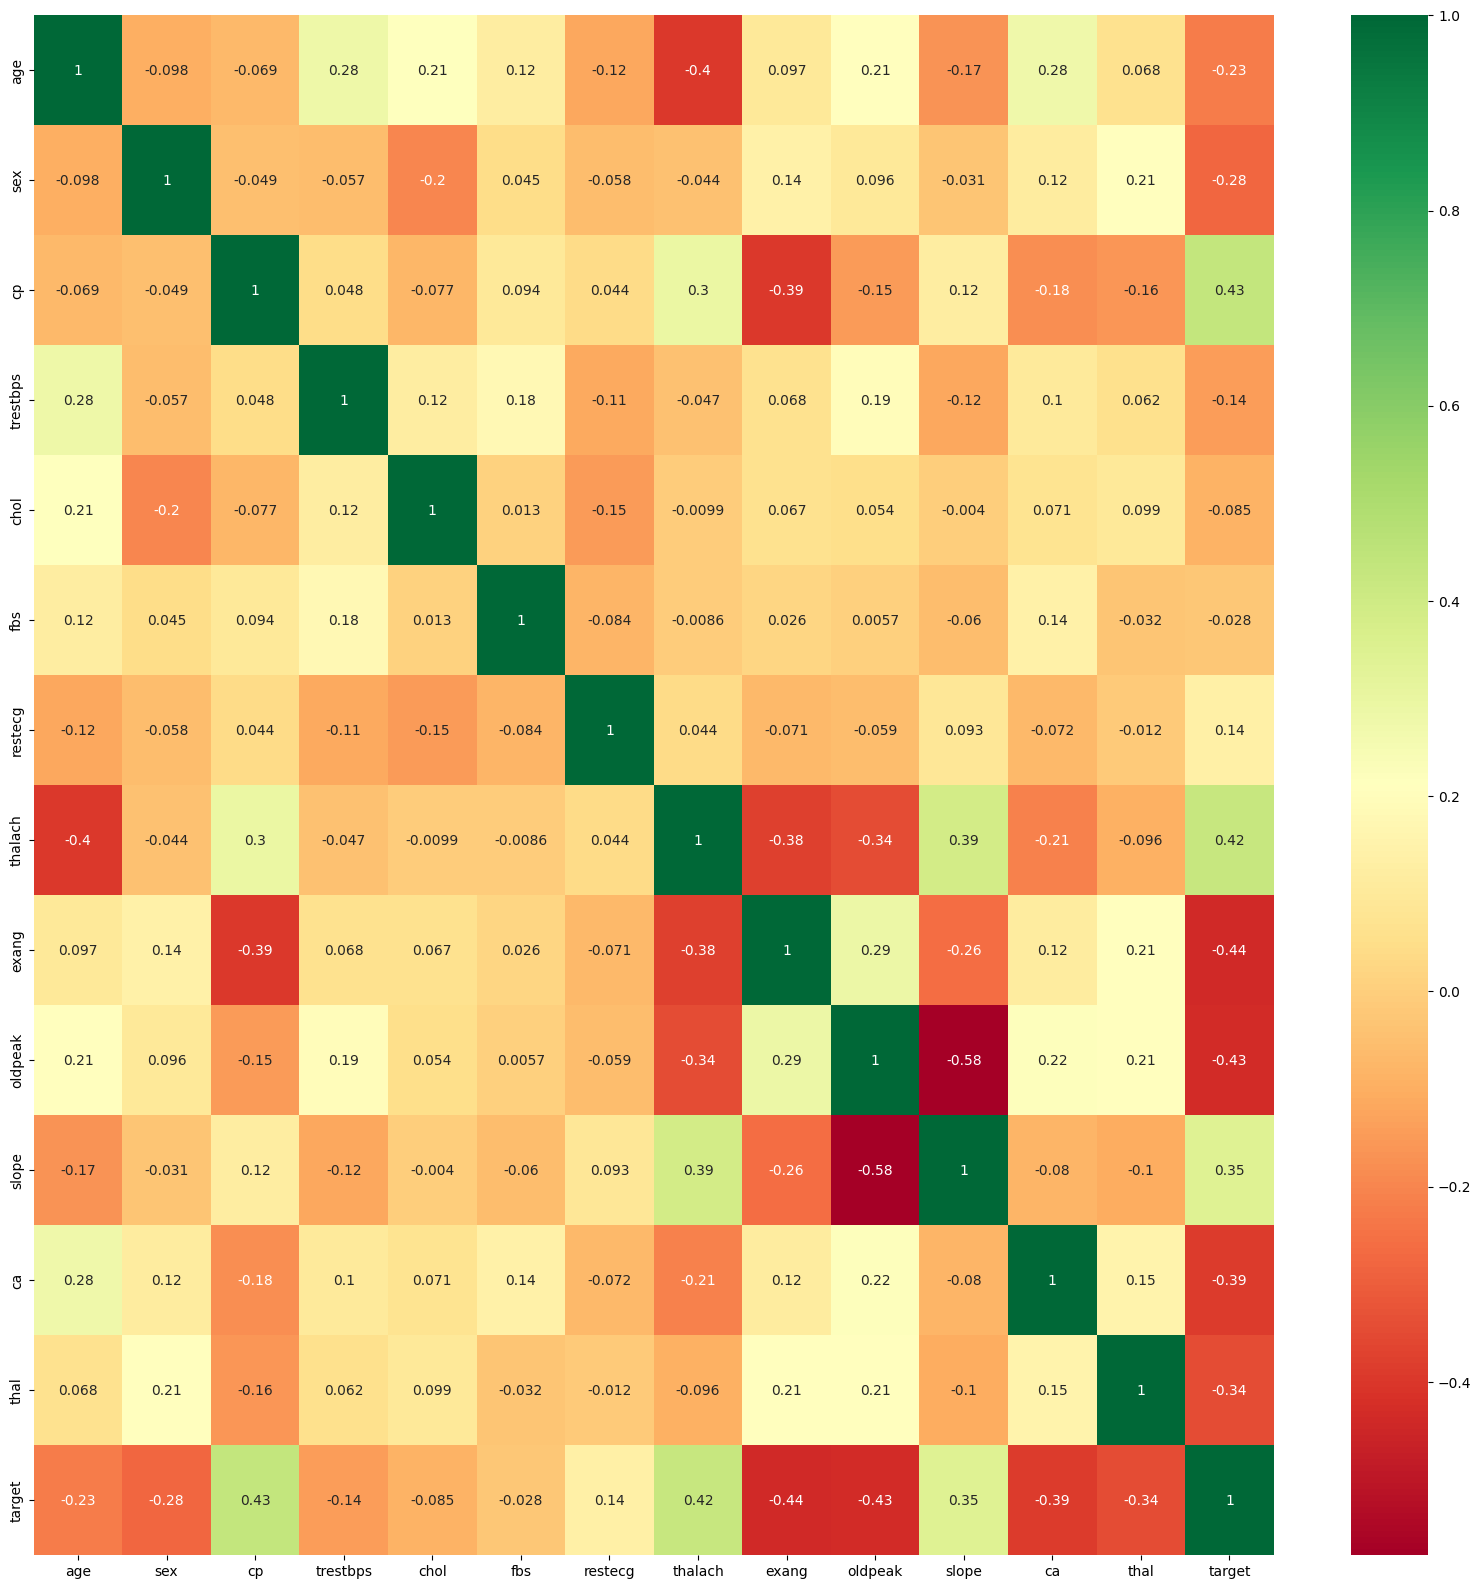

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

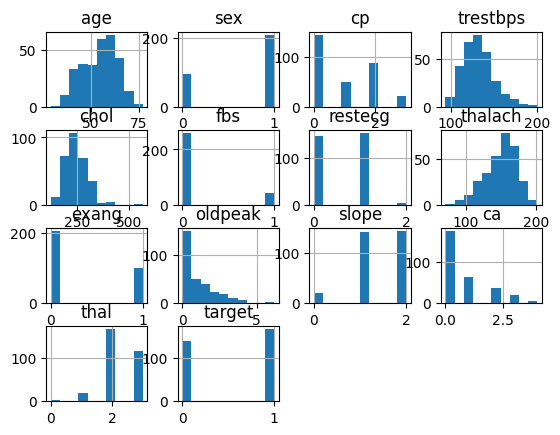

In [ ]:
df.hist()

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

<Axes: xlabel='target', ylabel='count'>

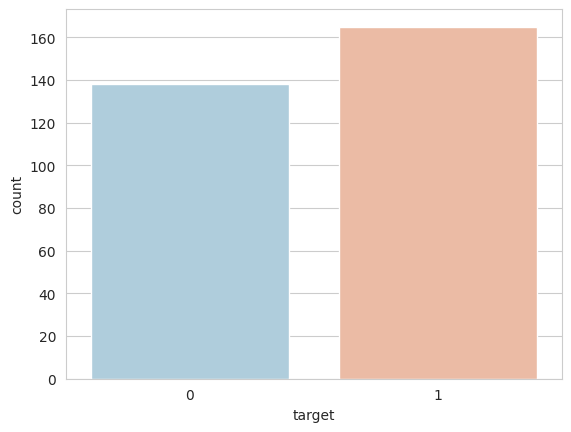

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

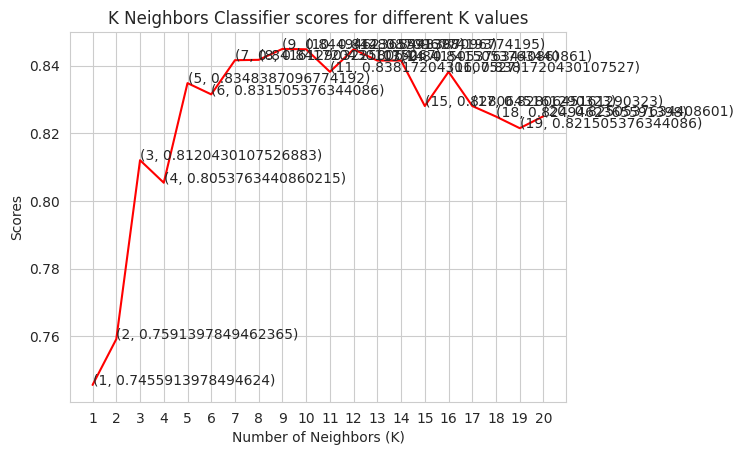

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score_knn=cross_val_score(knn_classifier,X,y,cv=10)


In [ ]:
score_knn.mean()

0.8448387096774195

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_predict

# Predict using K-Nearest Neighbors Classifier
y_pred_knn = cross_val_predict(knn_classifier, X, y, cv=10)

# Confusion Matrix
confusion_knn = confusion_matrix(y, y_pred_knn)
print("Confusion Matrix (K-Nearest Neighbors):")
print(confusion_knn)

# F1 Score
f1_knn = f1_score(y, y_pred_knn)
print(f"F1 Score (K-Nearest Neighbors): {f1_knn}")

# Classification Report
report_knn = classification_report(y, y_pred_knn)
print("Classification Report (K-Nearest Neighbors):")
print(report_knn)


Confusion Matrix (K-Nearest Neighbors):
[[112  26]
 [ 21 144]]
F1 Score (K-Nearest Neighbors): 0.8597014925373134
Classification Report (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       138
           1       0.85      0.87      0.86       165

    accuracy                           0.84       303
   macro avg       0.84      0.84      0.84       303
weighted avg       0.84      0.84      0.84       303



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score_rf=cross_val_score(randomforest_classifier,X,y,cv=10)

In [ ]:
score_rf.mean()

0.795483870967742

In [ ]:
# Predict using Random Forest Classifier
y_pred_rf = cross_val_predict(randomforest_classifier, X, y, cv=10)

# Confusion Matrix
confusion_rf = confusion_matrix(y, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(confusion_rf)

# F1 Score
f1_rf = f1_score(y, y_pred_rf)
print(f"F1 Score (Random Forest): {f1_rf}")

# Classification Report
report_rf = classification_report(y, y_pred_rf)
print("Classification Report (Random Forest):")
print(report_rf)

Confusion Matrix (Random Forest):
[[113  25]
 [ 27 138]]
F1 Score (Random Forest): 0.8414634146341462
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       138
           1       0.85      0.84      0.84       165

    accuracy                           0.83       303
   macro avg       0.83      0.83      0.83       303
weighted avg       0.83      0.83      0.83       303



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()

# Perform cross-validation and calculate mean accuracy score
decision_tree_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)

# Print the mean accuracy score
print(f"Mean Accuracy Score (Decision Tree): {decision_tree_scores.mean()}")


Mean Accuracy Score (Decision Tree): 0.7189247311827957


In [ ]:
# Predict using Decision Tree Classifier
y_pred_dt = cross_val_predict(decision_tree_classifier, X, y, cv=10)

# Confusion Matrix
confusion_dt = confusion_matrix(y, y_pred_dt)
print("Confusion Matrix (Decision Tree):")
print(confusion_dt)

# F1 Score
f1_dt = f1_score(y, y_pred_dt)
print(f"F1 Score (Decision Tree): {f1_dt}")

# Classification Report
report_dt = classification_report(y, y_pred_dt)
print("Classification Report (Decision Tree):")
print(report_dt)

Confusion Matrix (Decision Tree):
[[ 98  40]
 [ 37 128]]
F1 Score (Decision Tree): 0.7687687687687688
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       138
           1       0.76      0.78      0.77       165

    accuracy                           0.75       303
   macro avg       0.74      0.74      0.74       303
weighted avg       0.75      0.75      0.75       303



In [ ]:
from sklearn.svm import SVC

# Create a Support Vector Machine Classifier
svm_classifier = SVC()

# Perform cross-validation and calculate mean accuracy score
svm_scores = cross_val_score(svm_classifier, X, y, cv=10)

# Print the mean accuracy score
print(f"Mean Accuracy Score (SVM): {svm_scores.mean()}")


Mean Accuracy Score (SVM): 0.8379569892473118


In [ ]:

# Predict using Support Vector Machine Classifier
y_pred_svm = cross_val_predict(svm_classifier, X, y, cv=10)

# Confusion Matrix
confusion_svm = confusion_matrix(y, y_pred_svm)
print("Confusion Matrix (Support Vector Machine):")
print(confusion_svm)

# F1 Score
f1_svm = f1_score(y, y_pred_svm)
print(f"F1 Score (Support Vector Machine): {f1_svm}")

# Classification Report
report_svm = classification_report(y, y_pred_svm)
print("Classification Report (Support Vector Machine):")
print(report_svm)


Confusion Matrix (Support Vector Machine):
[[110  28]
 [ 21 144]]
F1 Score (Support Vector Machine): 0.8545994065281899
Classification Report (Support Vector Machine):
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       138
           1       0.84      0.87      0.85       165

    accuracy                           0.84       303
   macro avg       0.84      0.83      0.84       303
weighted avg       0.84      0.84      0.84       303



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()

# Perform cross-validation and calculate mean accuracy score
naive_bayes_scores = cross_val_score(naive_bayes_classifier, X, y, cv=10)

# Print the mean accuracy score
print(f"Mean Accuracy Score (Naive Bayes): {naive_bayes_scores.mean()}")


Mean Accuracy Score (Naive Bayes): 0.8018279569892475


In [ ]:
# Predict using Naive Bayes Classifier
y_pred_nb = cross_val_predict(naive_bayes_classifier, X, y, cv=10)

# Confusion Matrix
confusion_nb = confusion_matrix(y, y_pred_nb)
print("Confusion Matrix (Naive Bayes):")
print(confusion_nb)

# F1 Score
f1_nb = f1_score(y, y_pred_nb)
print(f"F1 Score (Naive Bayes): {f1_nb}")

# Classification Report
report_nb = classification_report(y, y_pred_nb)
print("Classification Report (Naive Bayes):")
print(report_nb)

Confusion Matrix (Naive Bayes):
[[109  29]
 [ 31 134]]
F1 Score (Naive Bayes): 0.8170731707317073
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       138
           1       0.82      0.81      0.82       165

    accuracy                           0.80       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.80      0.80      0.80       303



In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Classifier
logistic_regression_classifier = LogisticRegression()

# Perform cross-validation and calculate mean accuracy score
logistic_regression_scores = cross_val_score(logistic_regression_classifier, X, y, cv=10)

# Print the mean accuracy score
print(f"Mean Accuracy Score (Logistic Regression): {logistic_regression_scores.mean()}")


Mean Accuracy Score (Logistic Regression): 0.8511827956989247


In [ ]:
# Predict using Logistic Regression Classifier
y_pred_lr = cross_val_predict(logistic_regression_classifier, X, y, cv=10)

# Confusion Matrix
confusion_lr = confusion_matrix(y, y_pred_lr)
print("Confusion Matrix (Logistic Regression):")
print(confusion_lr)

# F1 Score
f1_lr = f1_score(y, y_pred_lr)
print(f"F1 Score (Logistic Regression): {f1_lr}")

# Classification Report
report_lr = classification_report(y, y_pred_lr)
print("Classification Report (Logistic Regression):")
print(report_lr)

Confusion Matrix (Logistic Regression):
[[113  25]
 [ 20 145]]
F1 Score (Logistic Regression): 0.8656716417910447
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       138
           1       0.85      0.88      0.87       165

    accuracy                           0.85       303
   macro avg       0.85      0.85      0.85       303
weighted avg       0.85      0.85      0.85       303



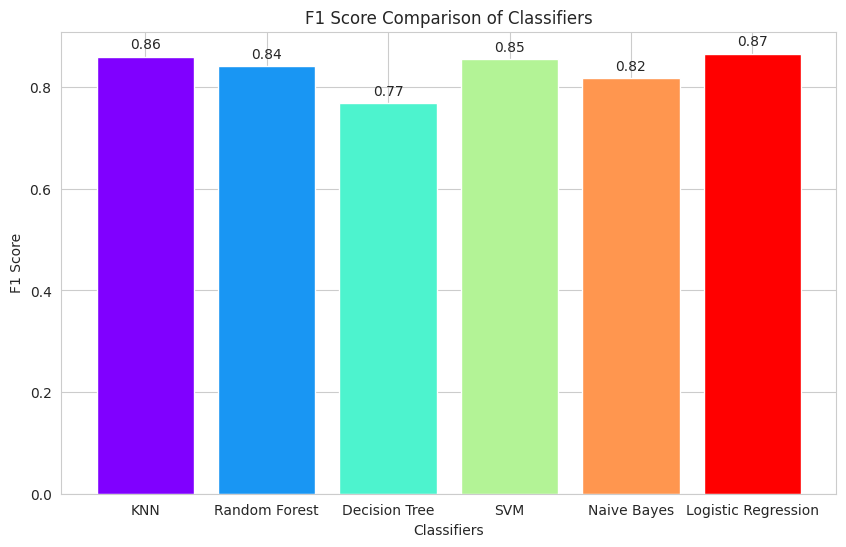

In [ ]:

# Define the classifiers and their corresponding F1 scores
classifiers = ['KNN', 'Random Forest', 'Decision Tree','SVM', 'Naive Bayes', 'Logistic Regression']
f1_scores = [f1_knn, f1_rf, f1_dt,f1_svm, f1_nb, f1_lr]

# Set up a color palette
colors = rainbow(np.linspace(0, 1, len(classifiers)))

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_scores, color=colors)

# Add labels and title
plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Classifiers')

# Add F1 score labels on the bars
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f'{f1:.2f}', ha='center', va='bottom', fontsize=10)

# Display the graph
plt.show()


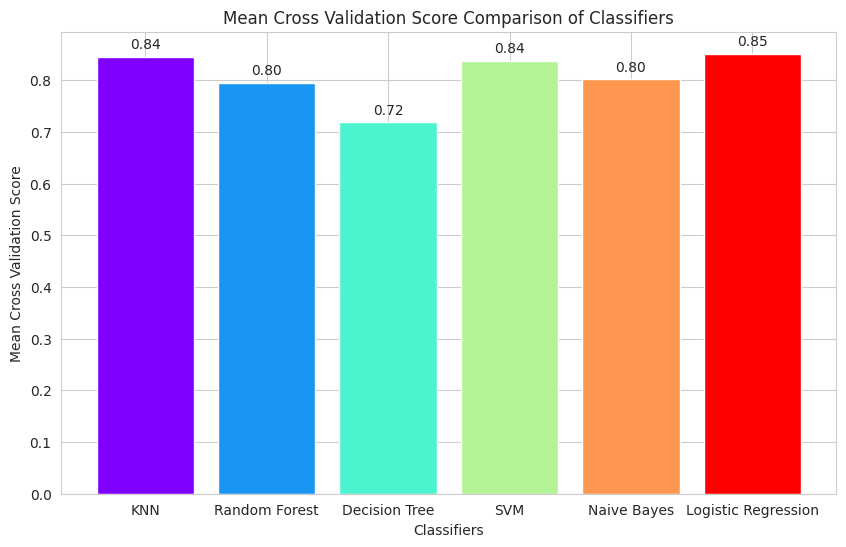

In [ ]:
# Define the classifiers and their corresponding cross-validation scores
classifiers = ['KNN', 'Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'Logistic Regression']
cv_scores = [score_knn.mean(), score_rf.mean(), np.mean(decision_tree_scores), svm_scores.mean(), naive_bayes_scores.mean(), logistic_regression_scores.mean()]

# Set up a color palette
colors = rainbow(np.linspace(0, 1, len(classifiers)))

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, cv_scores, color=colors)

# Add labels and title
plt.xlabel('Classifiers')
plt.ylabel('Mean Cross Validation Score')
plt.title('Mean Cross Validation Score Comparison of Classifiers')

# Add CV score labels on the bars
for i, score in enumerate(cv_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

# Display the graph
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier

# We need to Ensure all classifiers are initialized and fitted if needed
# Note: Some of our models such as SVC by default do not output probabilities needed for soft voting.
#We need to enable probability estimates for SVC, but this might slow down training.

# Reinitialize the SVM classifier with probability estimates
svm_classifier = SVC(probability=True)
svm_classifier.fit(X, y)  # Assuming X and y are your features and target variable from the dataset

# Create a VotingClassifier with both hard and soft voting
classifiers = [
    ('knn', knn_classifier),
    ('random forest', randomforest_classifier),
    ('decision tree', decision_tree_classifier),
    ('svm', svm_classifier),
    ('naive bayes', naive_bayes_classifier),
    ('logistic regression', logistic_regression_classifier)
]

# Hard Voting
voting_clf_hard = VotingClassifier(estimators=classifiers, voting='hard')
score_voting_hard = cross_val_score(voting_clf_hard, X, y, cv=10).mean()
print("Hard Voting Score: ", score_voting_hard)

# Soft Voting
voting_clf_soft = VotingClassifier(estimators=classifiers, voting='soft')
score_voting_soft = cross_val_score(voting_clf_soft, X, y, cv=10).mean()
print("Soft Voting Score: ", score_voting_soft)

# Fit the voting classifier
voting_clf_hard.fit(X, y)

# Predictions
y_pred_voting = cross_val_predict(voting_clf_hard, X, y, cv=10)

# Confusion Matrix
confusion_voting = confusion_matrix(y, y_pred_voting)
print("Confusion Matrix (Voting Classifier):")
print(confusion_voting)

# F1 Score
f1_voting = f1_score(y, y_pred_voting)
print(f"F1 Score (Voting Classifier): {f1_voting}")

# Classification Report
report_voting = classification_report(y, y_pred_voting)
print("Classification Report (Voting Classifier):")
print(report_voting)

Hard Voting Score:  0.8346236559139785
Soft Voting Score:  0.8410752688172043
Confusion Matrix (Voting Classifier):
[[115  23]
 [ 25 140]]
F1 Score (Voting Classifier): 0.853658536585366
Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       138
           1       0.86      0.85      0.85       165

    accuracy                           0.84       303
   macro avg       0.84      0.84      0.84       303
weighted avg       0.84      0.84      0.84       303



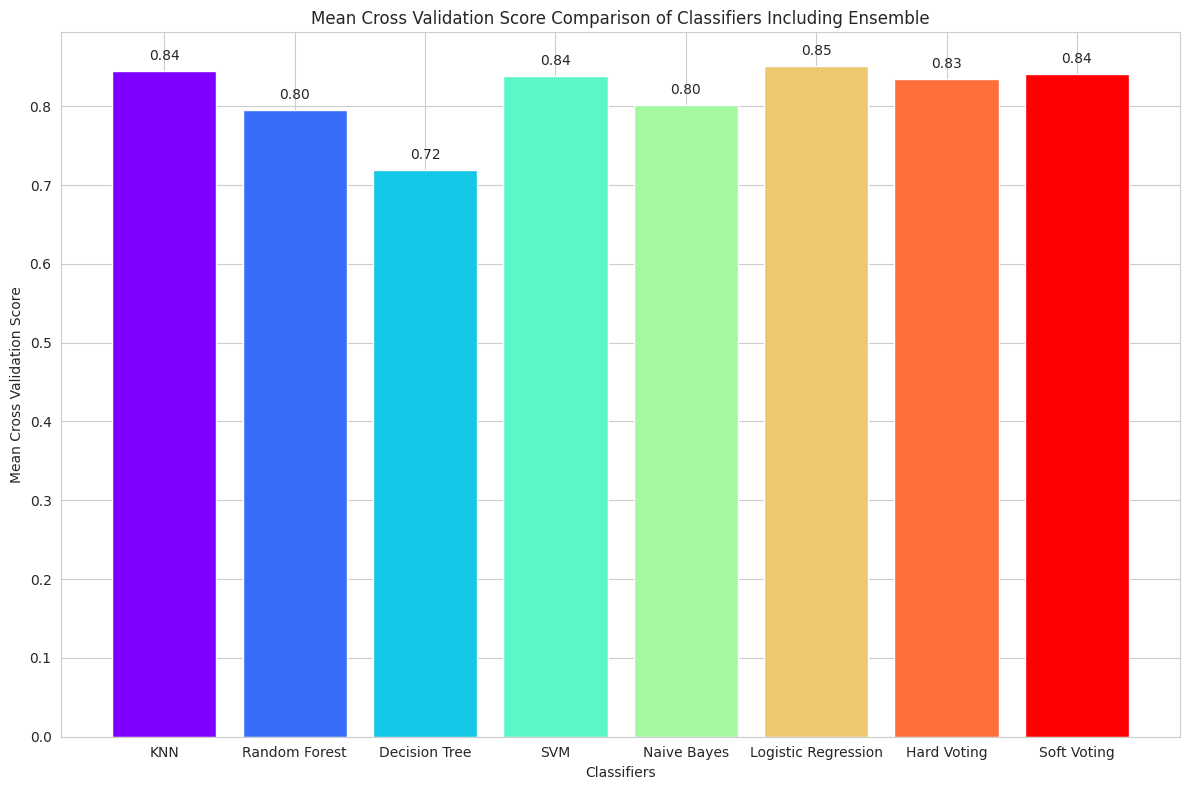

In [ ]:
# Define the classifiers and their corresponding cross-validation scores, now including ensemble classifiers
classifiers = ['KNN', 'Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'Logistic Regression', 'Hard Voting', 'Soft Voting']
cv_scores = [
    score_knn.mean(),
    score_rf.mean(),
    np.mean(decision_tree_scores),
    svm_scores.mean(),
    naive_bayes_scores.mean(),
    logistic_regression_scores.mean(),
    score_voting_hard,
    score_voting_soft
]

# Set up a color palette
colors = rainbow(np.linspace(0, 1, len(classifiers)))

# Create a bar chart
plt.figure(figsize=(12, 8)) # Adjusted for better fit
plt.bar(classifiers, cv_scores, color=colors)

# Add labels and title
plt.xlabel('Classifiers')
plt.ylabel('Mean Cross Validation Score')
plt.title('Mean Cross Validation Score Comparison of Classifiers Including Ensemble')

# Add CV score labels on the bars
for i, score in enumerate(cv_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

# Display the graph
plt.tight_layout() # Adjust layout to not cut off labels
plt.show()